In [2]:
using ITensors
using KrylovKit: eigsolve
using LinearAlgebra
using Plots
using JLD2

In [5]:

  function testeigpowers()
    es = (2, 1, 1+im, 1-2*im)
    @show abs.(es)
    plot([real(es[1]^n) for n in 1:30])
    plot!([real(es[2]^n) for n in 1:30])
    plot!([real(es[3]^n) for n in 1:30])
    plot!([real(es[4]^n) for n in 1:30])


  end


function testeigpowers_anim(nmax)

  es = (2, 1+0.5im, 1-2*im)
  @show abs.(es)

  anim = @animate for ii in 1:nmax
  
    plot([real(es[1]^n) for n in 1:ii], label=es[1])
    plot!([real(es[2]^n) for n in 1:ii],label=es[2])
    plot!([real(es[3]^n) for n in 1:ii],label=es[3])
    scatter!([real(es[3]^n) for n in 1:ii],label=nothing)


    end

  gif(anim,fps=1)
end

testeigpowers_anim (generic function with 1 method)

abs.(es) = (2, 1.118033988749895, 2.23606797749979)


┌ Info: Saved animation to /var/folders/lh/t1j2dd9171q8z7x5ff9j4b2w0000gn/T/jl_eJQZifiBU9.gif
└ @ Plots /Users/uno/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/var/folders/lh/t1j2dd9171q8z7x5ff9j4b2w0000gn/T/jl_eJQZifiBU9.gif")
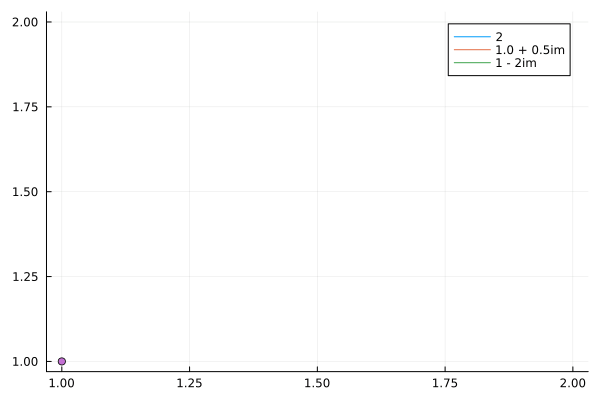

In [6]:
testeigpowers_anim(20)

In [60]:
t1 = Array([1.,  2.,  3.])/norm([1.,  2.,  3.])

3-element Vector{Float64}:
 0.2672612419124244
 0.5345224838248488
 0.8017837257372732

In [72]:
# build a matrix with these eigenvalues

A = rand(3,3)
Q, R = qr(A)
# now Q is ortho

evs = diagm([2, 1, 0.5])

M1 = Q * evs * inv(Q)

3×3 Matrix{Float64}:
 0.888117  0.422348  0.470694
 0.422348  1.08279   0.274613
 0.470694  0.274613  1.5291

In [73]:
vals, vecs = eigen(M1, sortby= x-> -abs(x))
@show vals
v1 = vecs[:,1]
@show abs.(vals)
@show M1 * v1 ≈ vals[1]* v1


vals = [2.0000000000000004, 1.0000000000000004, 0.4999999999999999]
abs.(vals) = [2.0000000000000004, 1.0000000000000004, 0.4999999999999999]
M1 * v1 ≈ vals[1] * v1 = true


true

3-element Vector{Float64}:
 0.2672612419124244
 0.5345224838248488
 0.8017837257372732

In [61]:
tn = t1 
diffs = []
for nn = 1:50
    tn = M1 * tn / norm(M1*tn)
    push!(diffs, norm(tn - v1))
end
tn

3-element Vector{Float64}:
 0.584566656879361
 0.810609917519591
 0.034545409011466785

In [75]:
# build a matrix with these eigenvalues

A = rand(3,3)
Q, R = qr(A)
# now Q is ortho
evs = diagm([2, 1+0.5im, 1-2*im])

M2 = Q * evs * inv(Q)

vals, vecs = eigen(M2, sortby= x-> -abs(x))
@show vals
v1 = vecs[:,1]
@show abs.(vals)
@show M2 * v1 ≈ vals[1]* v1


vals = ComplexF64[0.9999999999999993 - 1.9999999999999996im, 2.0000000000000004 + 2.5847379792054426e-16im, 1.0 + 0.49999999999999994im]
abs.(vals) = [2.236067977499789, 2.0000000000000004, 1.118033988749895]
M2 * v1 ≈ vals[1] * v1 = true


true

In [68]:
diffs2 = []

tn = t1 
for nn = 1:200
    tn = M2 * tn / norm(M2*tn)
    push!(diffs2, norm(tn - v1))
end
tn

3-element Vector{ComplexF64}:
 -0.03134474064655744 + 0.5960559174460215im
  0.03530437192392402 - 0.671352807062876im
  0.02299708140171595 - 0.437315669202738im

In [77]:
# build a matrix with these eigenvalues

A = rand(3,3)
Q, R = qr(A)
# now Q is ortho
evs = diagm([6+2*im, 1+0.5im, 1-2*im])

M3 = Q * evs * inv(Q)

vals, vecs = eigen(M3, sortby= x-> -abs(x))
@show vals
v1 = vecs[:,1]
abs.(vals)
@show abs.(vals)
@show M3 * v1 ≈ vals[1]* v1


vals = ComplexF64[5.999999999999999 + 2.0im, 1.0 - 2.0000000000000004im, 1.0000000000000009 + 0.5000000000000002im]
abs.(vals) = [6.324555320336758, 2.2360679774997902, 1.1180339887498958]
M3 * v1 ≈ vals[1] * v1 = true


true

In [78]:
diffs3 = []

tn = t1 
for nn = 1:200
    tn = M3 * tn / norm(M3*tn)
    push!(diffs3, norm(tn - v1))
end
tn

3-element Vector{ComplexF64}:
 0.033689486219340564 + 0.640643918687184im
  0.04013586967214944 + 0.7632292359484764im
 0.003447851515983216 + 0.06556482018960046im

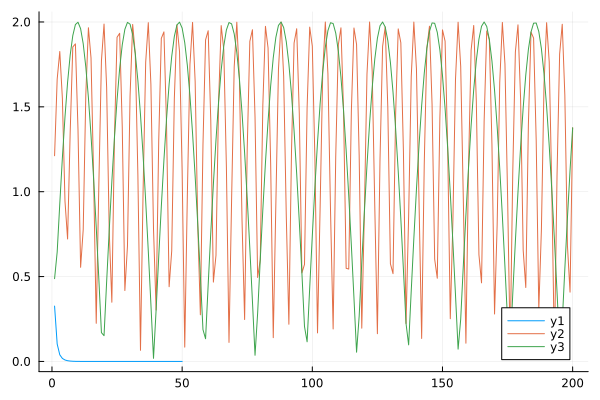

In [79]:
plot(diffs)
plot!(diffs2)
plot!(diffs3)

In [81]:
f1 = jldopen("out_compare_v2.jld2")

JLDFile /Users/uno/tensornetworks/fes_oe/julia_code/generalized_dmrg/out_compare_v2.jld2 (read-only)
 ├─🔢 methods
 ├─🔢 ts
 └─🔢 ens

In [87]:
length(f1["ens"][1])

10

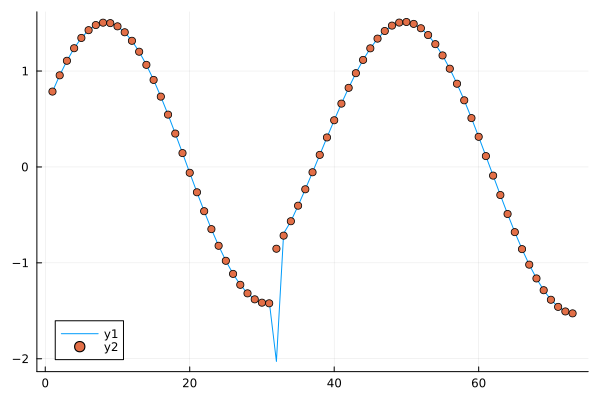

In [90]:
pmet = plot()
plot!(pmet, [real(aa[5]) for aa in f1["ens"]])
scatter!(pmet, [real(aa[1]) for aa in f1["ens"]])

pmet_i = plot()
plot!(pmet_i, [imag(aa[5]) for aa in f1["ens"]])
scatter!(pmet_i, [imag(aa[1]) for aa in f1["ens"]])

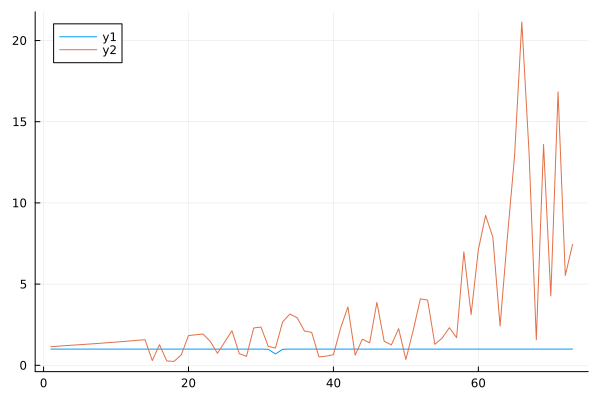

In [98]:
pmet = plot()
plot!([abs(inner(p[8], p[9])/sqrt(inner(p[8], p[8]))) for p in f1["ens"]])
plot!([abs(inner(p[8], p[10])/sqrt(inner(p[8], p[8]))) for p in f1["ens"]])

In [82]:
overlaps1 = []
overlaps2 = []
overlaps3 = []
for elem in f1["ens"]
    push!(overlaps1, inner(elem[1],elem[2]))
    push!(overlaps2, inner(elem[1],elem[3]))
    push!(overlaps3, inner(elem[2],elem[3]))
end

MethodError: MethodError: no method matching inner(::ComplexF64, ::ComplexF64)

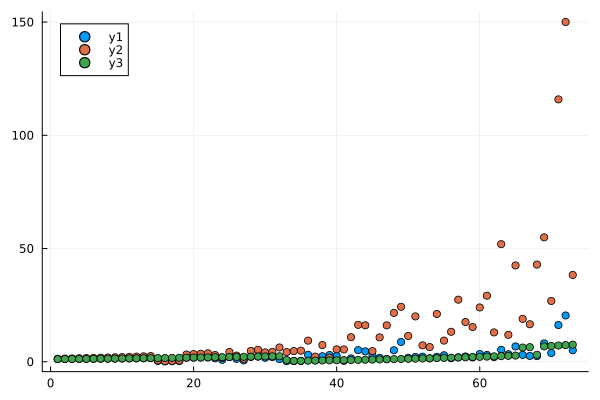

In [56]:
scatter(norm.(overlaps1))
scatter!(norm.(overlaps2))
scatter!(norm.(overlaps3))